# **Python for Finance -- Data -- Assignment**
---
<img src="http://www.doc.ic.ac.uk/~afd/images/logo_imperial_college_london.png" align = "left" width=200>
 <br><br><br><br>
 
- Copyright (c) Antoine Jacquier, 2022. All rights reserved

- Author: Antoine Jacquier <a.jacquier@imperial.ac.uk>

- Platform: Tested on Windows 10 with Python 3.7

## Data Import and visualisation

- Import a history of time series of your stock of your choice and plot a histogram of the returns using the `sns` library.

- Using `yahoo_fin`, create a dictionary where each key is a ticker of the S&P500 and the value is a table containing all the daily values of the ticker between 1/1/2018 and 5/1/2018. *Hint: you may want to also use the `try` command to handle any possible errors.*

(array([1.000e+00, 1.000e+00, 6.000e+00, 1.150e+02, 2.288e+03, 1.000e+02,
        5.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([-0.15344237, -0.11922691, -0.08501144, -0.05079598, -0.01658052,
         0.01763494,  0.0518504 ,  0.08606586,  0.12028132,  0.15449678,
         0.18871224]),
 <BarContainer object of 10 artists>)

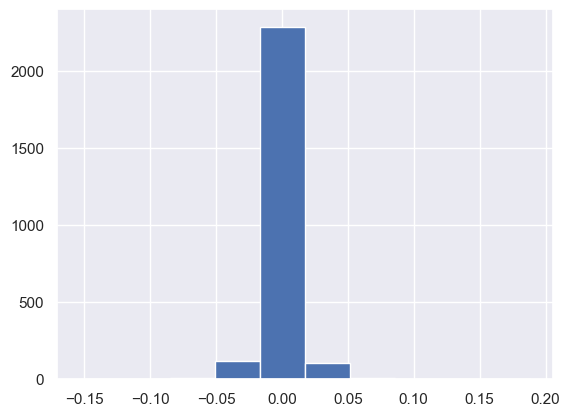

In [2]:
from yahoo_fin import stock_info as si
import matplotlib.pyplot as plt
import seaborn as sns

mcd_stock = si.get_data(ticker='mcd', start_date='26/11/2012')['close']
mcd_return = (mcd_stock.shift(1) - mcd_stock) / mcd_stock
mcd_return = mcd_return.dropna()
# mcd_return.head()

sns.set()
plt.hist(mcd_return)

In [3]:
stock_val_dic = dict()
ticker_list = si.tickers_sp500()

for tk in ticker_list:
    try:
        stock_val_dic[tk] = si.get_data(ticker=tk, start_date='01/01/2018', end_date='05/01/2018')
    except:
        print(tk)

CARR
CEG
CTVA
DOW
FOX
FOXA
MRNA
OGN
OTIS


In [4]:
exception_tk = 'OTIS'
test_stk_val = si.get_data(exception_tk)
test_stk_val

,open,high,low,close,adjclose,volume,ticker
2020-03-19,40.000000,46.000000,40.000000,45.250000,43.651077,7000,OTIS
2020-03-20,45.009998,46.009998,45.000000,45.000000,43.409916,3600,OTIS
2020-03-23,42.000000,42.000000,39.980000,40.000000,38.586590,11900,OTIS
2020-03-24,40.000000,40.000000,39.000000,40.000000,38.586590,77800,OTIS
2020-03-25,40.000000,44.799999,38.000000,41.009998,39.560894,7000,OTIS
...,...,...,...,...,...,...,...
2022-11-18,78.180000,78.760002,77.419998,77.760002,77.760002,3697600,OTIS
2022-11-21,77.470001,78.519997,76.805000,78.190002,78.190002,2068800,OTIS
2022-11-22,78.559998,78.589996,77.599998,78.250000,78.250000,1916300,OTIS
2022-11-23,77.970001,78.529999,77.510002,78.099998,78.099998,1898000,OTIS


## Application to option pricing **NOT WORKING!**

Using the `bokeh` library, analyse graphically the influence of the maturity $T$ and the volatility parameter $\sigma$ on the function $K\mapsto C^{\mathrm{BS}}(S_0, K, T, \sigma)$, for some fixed $S_0 = 100$, as $K$ ranges from $50$ to $100$. We assume no interest and no dividend.

In [ ]:
!pip install bokeh

In [4]:
from bokeh.io import output_file, show
from bokeh.layouts import widgetbox
from bokeh.models.widgets import Button, RadioButtonGroup, Select, Slider

output_file("layout_widgets.html")

# create some widgets
slider = Slider(start=0, end=10, value=1, step=.1, title="Slider")
button_group = RadioButtonGroup(labels=["Option 1", "Option 2", "Option 3"], active=0)
select = Select(title="Option:", value="foo", options=["foo", "bar", "baz", "quux"])
button_1 = Button(label="Button 1")
button_2 = Button(label="Button 2")

# put the results in a row
show(widgetbox(button_1, slider, button_group, select, button_2, width=300))

ImportError: cannot import name 'widgetbox' from 'bokeh.layouts' (/opt/homebrew/lib/python3.9/site-packages/bokeh/layouts.py)

In [2]:
import bokeh.plotting
import bokeh.io
import numpy as np

bokeh.io.output_notebook()

Loading BokehJS ...

In [ ]:
import scipy.stats as sc

T = 10
sig = 0.1
S0 = 100
r = 0
K_vec = np.linspace(50, 100, num=500)

d1 = (np.log(S0/K_vec) + 0.5*sig**2*T) /sig /np.sqrt(T)
d2 = (np.log(S0/K_vec) - 0.5*sig**2*T) /sig /np.sqrt(T)
C_vec = S0 * sc.norm.cdf(d1) - K_vec * np.exp(-r*T) * sc.norm.cdf(d2)
p = bokeh.plotting.figure()
p.line(K_vec, C_vec)
bokeh.plotting.show(p)


## Analysis of the S&P 500

What are the 5 largest holders of S&P 500 companies and how much do they own in total?

### Testing

In [47]:
# I want a table: Holder | Val of stock 1 | Val of stock 2 | ....
# merge: reset_index before merging
import pandas as pd

holders_mcd = si.get_holders('MCD')['Top Institutional Holders'].loc[:,['Holder','Value']]
holders_mcd.columns = ['Holder', 'MCD']

holders_apl = si.get_holders('AAPL')['Top Institutional Holders']
holders_apl = holders_apl.loc[:,['Holder','Value']]
holders_apl.columns = ['Holder', 'AAPL']

empty_df = pd.DataFrame()
try:
    holders = pd.merge(empty_df, holders_apl, how='outer')
except:
    holders = empty_df if not empty_df.empty else holders_apl
holders.head()

,Holder,AAPL
0,Vanguard Total Stock Market Index Fund,67063726918
1,Vanguard 500 Index Fund,50406790893
2,SPDR S&P 500 ETF Trust,25543657956
3,Fidelity 500 Index Fund,24170588792
4,"Invesco ETF Tr-Invesco QQQ Tr, Series 1 ETF",21066470517


In [42]:
holders_mcd.head()

,Holder,MCD
0,Vanguard Total Stock Market Index Fund,5988000975
1,Vanguard 500 Index Fund,4501572350
2,SPDR S&P 500 ETF Trust,2311740200
3,Fidelity 500 Index Fund,2185658475
4,Vanguard/Wellington Fund Inc.,1823311600


In [43]:
holders_apl.head()

,Holder,AAPL
0,Vanguard Total Stock Market Index Fund,67063726918
1,Vanguard 500 Index Fund,50406790893
2,SPDR S&P 500 ETF Trust,25543657956
3,Fidelity 500 Index Fund,24170588792
4,"Invesco ETF Tr-Invesco QQQ Tr, Series 1 ETF",21066470517


In [49]:
df_holders = pd.DataFrame()
for tk in ticker_list:
    try:
        top_holders = si.get_holders(tk)['Top Institutional Holders'].loc[:,['Holder','Value']]
        top_holders.columns = ['Holder', tk]
        top_holders = top_holders.head(n=100)
        if df_holders.empty:
            df_holders = top_holders
        else:
            df_holders = pd.merge(df_holders, top_holders, how='outer')
    except:
        print("Skipping data for", tk)

df_holders.head()

Skipping data for FCX
Skipping data for GEN
Skipping data for J
Skipping data for T


,Holder,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACGL,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
0,Vanguard Total Stock Market Index Fund,1.045547e+09,242912902.0,308764173.0,6.190637e+10,7.970057e+09,654307507.0,315759149.0,5.601977e+09,477725835.0,...,175264326.0,1.134185e+09,1.062357e+10,226581116.0,414863029.0,953531106.0,648434522.0,454898207.0,226496194.0,2.144359e+09
1,Vanguard 500 Index Fund,7.889931e+08,182103769.0,234169133.0,4.653039e+10,5.990588e+09,472233783.0,249728432.0,4.210749e+09,NaN,...,132991889.0,8.530463e+08,7.985172e+09,170270064.0,311616802.0,716567517.0,487223314.0,341705117.0,170632884.0,1.790674e+09
2,Price (T.Rowe) Mid Cap Growth Fund,5.582190e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Vanguard Specialized-Health Care Fund,4.796013e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.441574e+08
4,SPDR S&P 500 ETF Trust,3.996593e+08,84597458.0,106263359.0,2.289314e+10,2.602637e+09,230709772.0,121121680.0,1.858485e+09,NaN,...,72552509.0,3.811718e+08,3.990975e+09,NaN,171054374.0,335100203.0,237177948.0,151994883.0,84085668.0,7.636204e+08


In [57]:
import numpy as np

X = np.array(df_holders.iloc[:,1:])
val_sum = np.nansum(X, axis=1)
df_holders['Total'] = val_sum
df_holders.sort_values(by='Total', ascending=False).head()['Holder']

0    Vanguard Total Stock Market Index Fund
1                   Vanguard 500 Index Fund
5                   Fidelity 500 Index Fund
4                    SPDR S&P 500 ETF Trust
6                  iShares Core S&P 500 ETF
Name: Holder, dtype: object